<a href="https://colab.research.google.com/github/VeneratioVitae/10-temperature-humidity/blob/master/Hamoye_opensource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Importing Dependencies and Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Preprocessing

In [3]:
#reading the csv file in and storing as dataframe with parsed dates
data = pd.read_csv("/content/drive/My Drive/datasets/weatherHistory.csv", parse_dates=['Formatted Date'])

In [4]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
#Taking a look at the dtypes for each of the columns and see those that would possibly need encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### Handling missing values

In [7]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
# Finding out the unique types in the column with missing values
data['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [11]:
precip_grp = data.groupby('Precip Type')

In [12]:
#looking at the min and max values for rain and snow in the Temperature column, we can infer that Temperatures <0 would be labelled as snow and vice versa for rain.
precip_grp['Temperature (C)'].agg(['min', 'max'])

,min,max
Precip Type,,
rain,0.005556,39.905556
snow,-21.822222,0.000000


In [13]:
#We use that inference to fill in the missing values
data.loc[data['Temperature (C)'] > 0, 'Precip Type'] = 'rain'

In [14]:
#No missing values again
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

### Date Time parsing

In [15]:
#Making a copy of the dataframe before starting label encoding and formating date time, just in case there's need to make a plot with the original dataframe
df1 = data.copy()

In [16]:
#The format for the date time provided in the data, as obtained from Pandas documentation
df1['Formatted Date'] = pd.to_datetime(df1['Formatted Date'], utc=True)

In [17]:
#Parsing the months from the date time format
df1['Month'] = df1['Formatted Date'].dt.month_name()

In [18]:
#Parsing the days from the date time format
df1["Day"] = df1["Formatted Date"].dt.day_name()

In [19]:
#Parsing the year from the date time format
df1['Year'] = pd.DatetimeIndex(df1['Formatted Date']).year


In [20]:
df1.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Month', 'Day', 'Year'],
      dtype='object')

### Label Encoding categorical variable columns

In [21]:
#label encoding the rain and snow variables to 0 and 1 respectively
df1['Precip Type_enc']=df1['Precip Type'].replace(['rain','snow'],[0,1])

In [22]:
df1['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [23]:
#label encoding the summary variables to 0,1, till len(summary column) respectively

df1['Summary_enc']=df1['Summary'].replace(df1['Summary'].unique(),range(0,len(df1['Summary'].unique())))
print(df1['Summary_enc'].value_counts())


0     31733
1     28094
2     16597
5     10890
3      7148
7       528
4       516
6       386
15       86
13       67
21       63
14       54
11       45
8        40
22       39
16       35
12       35
18       34
9        17
24       14
26       10
19        8
20        7
10        4
17        1
25        1
23        1
Name: Summary_enc, dtype: int64


In [24]:
#df1['Month'].unique()

In [25]:
#label encoding the month variables to 0,1, till len(month column) respectively

df1['Month_enc']=df1['Month'].replace(df1['Month'].unique(),range(0,len(df1['Month'].unique())))
print(df1['Month_enc'].value_counts())


3     8208
10    8184
9     8184
6     8184
5     8184
0     8184
2     8181
11    7920
8     7920
4     7920
1     7920
7     7464
Name: Month_enc, dtype: int64


In [26]:
#label encoding the Day variables to 0,1, till len(day column) respectively

df1['Day_enc']=df1['Day'].replace(df1['Day'].unique(),range(0,len(df1['Day'].unique())))
print(df1['Day_enc'].value_counts())


3    13797
6    13776
5    13776
4    13776
2    13776
1    13776
0    13776
Name: Day_enc, dtype: int64


In [27]:
#label encoding the Year variables to 0,1, till len(year column) respectively

df1['Year_enc']=df1['Year'].replace(df1['Year'].unique(),range(0,len(df1['Year'].unique())))
print(df1['Year_enc'].value_counts())


7     8784
4     8784
2     8784
11    8783
10    8760
8     8760
6     8760
5     8760
3     8760
0     8760
9     8757
1        1
Name: Year_enc, dtype: int64


In [28]:
df1['Year'].unique()

array([2006, 2005, 2010, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015,
       2016])

## Exploratory Data Analysis

In [29]:
yrmnt_grp = df1.groupby(['Year', 'Month'])

In [30]:
yrmnt_grp[['Temperature (C)', 'Humidity']].mean().loc[2006]

,Temperature (C),Humidity
Month,,
April,12.635031,0.728625
August,19.478726,0.760753
December,2.218220,0.905376
February,-0.065394,0.843467
January,-1.677942,0.834610
July,23.588665,0.656304
June,19.354622,0.747125
March,4.559274,0.778737
May,15.650732,0.721801


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


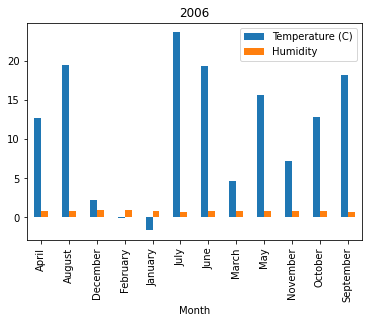

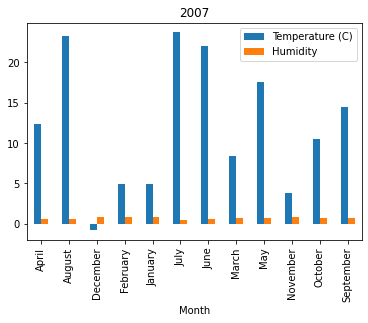

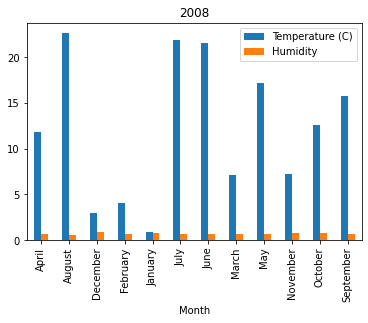

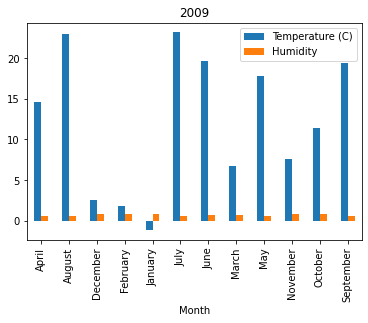

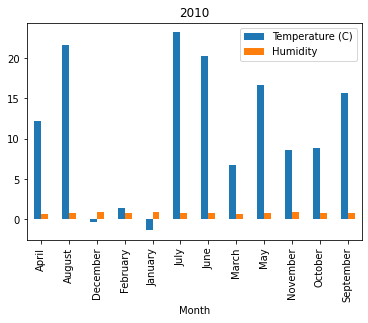

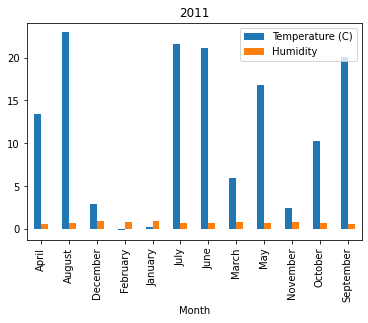

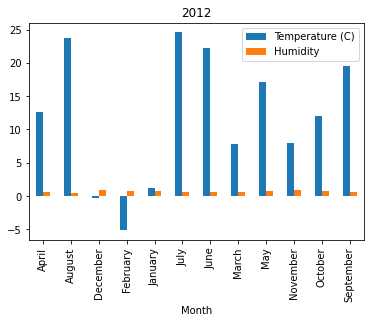

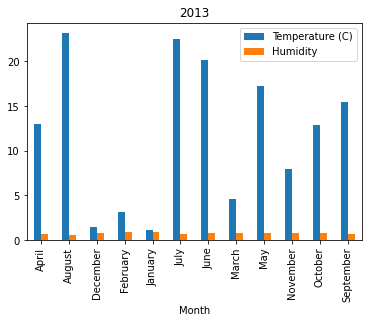

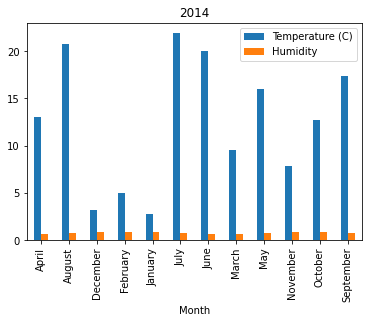

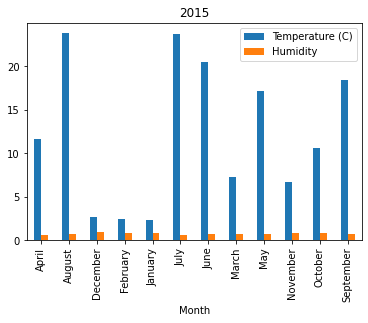

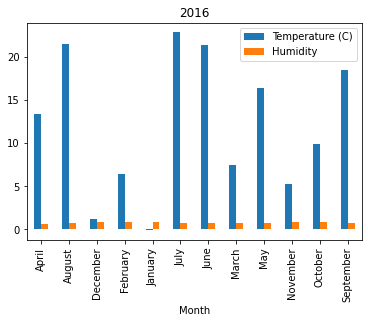

In [31]:
for i in range(2006, 2017):
  mntly = yrmnt_grp['Temperature (C)', 'Humidity'].mean().loc[i]
  mntly.plot(kind='bar')
  plt.title(str(i))
  plt.show()

## Correlation Analysis

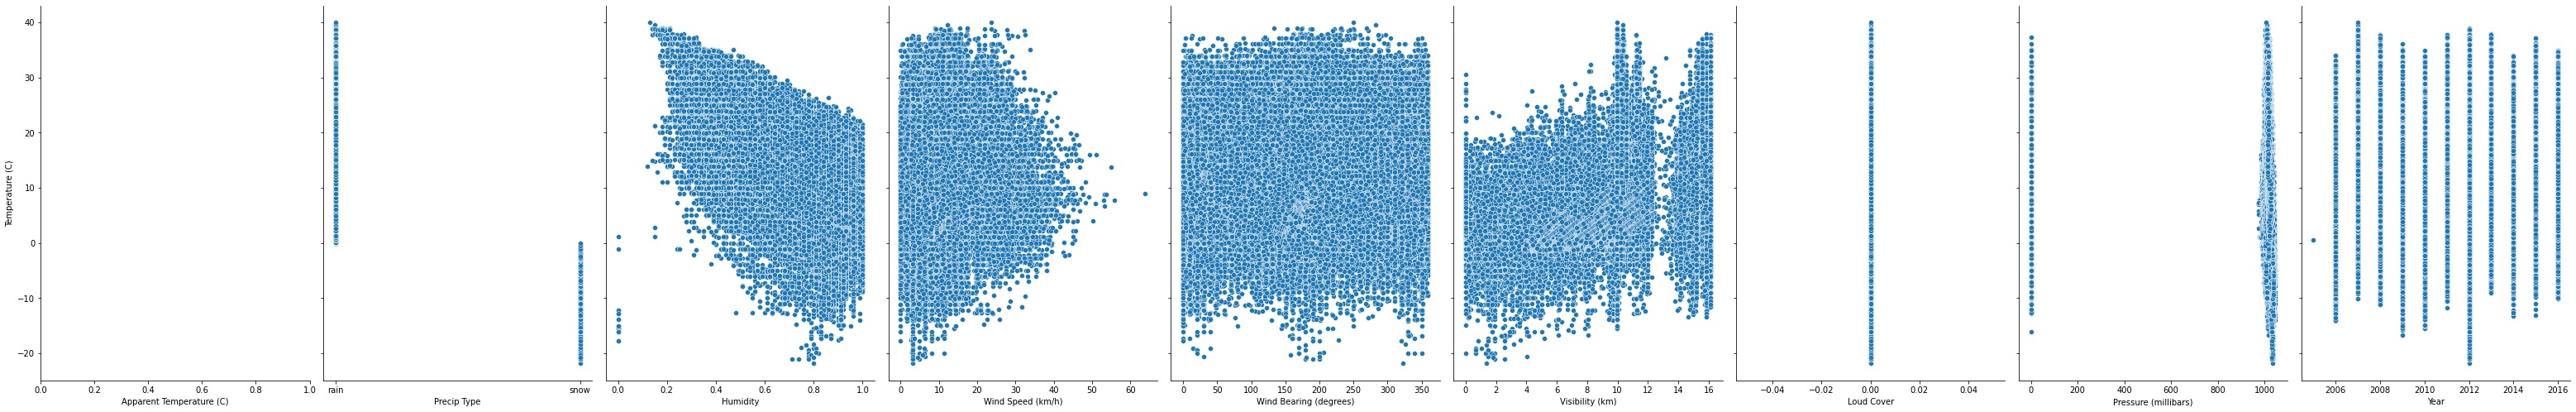

In [32]:
# visualize the relationship between the features and the response variable (Temperature) using scatterplots
sns.pairplot(df1, x_vars=['Apparent Temperature (C)', 'Precip Type', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Year'],
             y_vars='Temperature (C)', height=7, aspect=0.7
             )

In [56]:
#Obtaining a correlation matrix between all the features
corr_matrix = df1.corr(method="pearson")
corr_matrix

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Precip Type_enc,Summary_enc,Month_enc,Day_enc,Year_enc
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447,0.017462,-0.562620,-0.189548,0.048273,-0.004185,0.027233
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219,0.017171,-0.565207,-0.191901,0.059562,-0.002655,0.025591
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454,0.039257,0.232113,0.159994,0.099992,0.002147,-0.008172
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263,-0.004245,-0.067928,0.091787,-0.073274,-0.011649,0.000764
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651,-0.025685,-0.041984,-0.012780,-0.011350,0.004608,-0.026958
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818,0.107306,-0.312875,-0.184586,-0.037666,0.008515,0.127542
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000,0.016124,0.009008,-0.129836,-0.011004,-0.019303,0.017304
Year,0.017462,0.017171,0.039257,-0.004245,-0.025685,0.107306,NaN,0.016124,1.000000,-0.046176,-0.027043,0.000195,-0.000462,0.945091
Precip Type_enc,-0.562620,-0.565207,0.232113,-0.067928,-0.041984,-0.312875,NaN,0.009008,-0.046176,1.000000,0.116183,-0.012729,0.002228,-0.061376


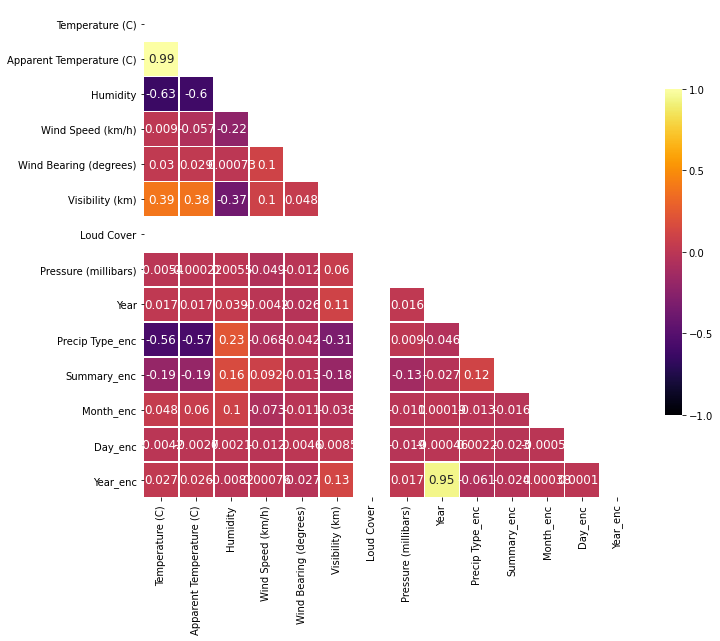

In [65]:
#Creating a heatmap to visualize the correlation between the features
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15)) 

heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'inferno',
                      cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [35]:
#This shows the degree of skewness in the continuous variable columns
df1.skew(axis = 0) 


Temperature (C)             0.094127
Apparent Temperature (C)   -0.057302
Humidity                   -0.715880
Wind Speed (km/h)           1.113493
Wind Bearing (degrees)     -0.154643
Visibility (km)            -0.498712
Loud Cover                  0.000000
Pressure (millibars)       -8.422506
Year                        0.000357
Precip Type_enc             2.475748
Summary_enc                 3.213905
Month_enc                   0.008445
Day_enc                     0.000000
Year_enc                   -0.144126
dtype: float64

In [36]:
#Pressure column is the most skewed with 75% of its values falling between 1011 and 1046 millibars and 25% between 0 and 1011 millibars
df1.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Precip Type_enc,Summary_enc,Month_enc,Day_enc,Year_enc
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.00000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,2011.00029,0.111059,1.595689,5.482815,3.000000,5.908982
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,3.16216,0.314207,1.980093,3.457776,1.999793,3.315477
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2005.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,2008.00000,0.000000,0.000000,2.000000,1.000000,3.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,2011.00000,0.000000,1.000000,5.000000,3.000000,6.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,2014.00000,0.000000,2.000000,9.000000,5.000000,9.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,2016.00000,1.000000,26.000000,11.000000,6.000000,11.000000


## Predictive Models and their performance metrics

In [37]:
df1.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month,Day,Year,Precip Type_enc,Summary_enc,Month_enc,Day_enc,Year_enc
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,March,Friday,2006,0,0,0,0,0
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,March,Friday,2006,0,0,0,0,0
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,April,Saturday,2006,0,1,1,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,April,Saturday,2006,0,0,1,1,0
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,April,Saturday,2006,0,1,1,1,0


In [38]:
y=pd.DataFrame()
y=df1['Temperature (C)']
X=df1.drop(['Temperature (C)','Formatted Date', 'Daily Summary', 'Summary', 'Precip Type', 'Loud Cover', 'Month', 'Day', 'Year'],axis=1)

In [39]:
#Chosen predictor variables
X.columns

Index(['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Precip Type_enc', 'Summary_enc', 'Month_enc', 'Day_enc', 'Year_enc'],
      dtype='object')

In [40]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=0)

### Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
l_regr = LinearRegression()

In [42]:
l_regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
l_regr_pred = l_regr.predict(X_test)

In [44]:
#RMSE error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,l_regr_pred))
print(rmse)

0.9478451320556246


In [45]:
import numpy as np
rss = np.sum(np.square(y_test - l_regr_pred))
print(rss)

17331.234917628553


In [46]:
# Trying to create a scatter plot of the y test vs predicted y value as a line... But i can't seem to quite get it to work
%matplotlib inline
pred = pd.DataFrame(l_regr.predict(X_test['Humidity']))
plt.scatter(X_test['Humidity'], y_test)
plt.plot(X_test['Humidity'], l_regr.predict(X_test['Humidity']), c = 'r')

ValueError: ignored

### Decision Tree Regression Model

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [49]:
#rmse
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,tree.predict(X_test)))
print(rmse)

0.07854072890368007


In [50]:
import numpy as np
rss = np.sum(np.square(y_test - tree.predict(X_test)))
print(rss)

118.99935185185184


### Random Forest Regression Model

In [51]:
from sklearn.ensemble import RandomForestRegressor

rfor = RandomForestRegressor(max_depth=50, n_estimators= 100)
rfor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
rmse=sqrt(mean_squared_error(y_test,rfor.predict(X_test)))
print(rmse)

0.04662445963118157


In [53]:
rss = np.sum(np.square(y_test - rfor.predict(X_test)))
print(rss)

41.93555199074073


In [54]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

## The RandomForest model seems to perform the best fom the RMSE of 0.047, followed by the Decision Tree model with RMSE of 0.078.